# Problem statement
- We need to build bootstrapping function for the Random forest from scratch

# <font color='red'><b>Bootstrapping Implementation from scratch</b> </font>

<font color='blue'> <b>Importing packages</b> </font>

In [75]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
import random
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

In [76]:
#loading data

boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [77]:
x.shape[1] #shape of the input

13

In [78]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

# <font color='blue'> <b>Task - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>

* <font color='blue'><b> Create 30 samples </b></font>

In [79]:
round((x.shape[0])*60/100)-1       # size of random sampling without repetition from 60% of 506 datapoints

303

In [80]:
x.shape[0]-(round((x.shape[0])*60/100)-1) #size of random sampling with repetition from 40% of sampled datapoint

203

In [81]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples
    
    
    selecting_rows=np.random.choice(len(input_data),round((input_data.shape[0])*60/100)-1, replace=False)                #random sampling index for 303 datapoints from X without repetition
    replacing_rows=np.random.choice(len(selecting_rows),(input_data.shape[0]-(round((input_data.shape[0])*60/100)-1)))   #random sampling index for 203 datapoints from sampled data with repetition
    selecting_columns=np.random.choice(x.shape[1],random.randint(3, input_data.shape[1]),replace=False)                  #getting random index for column without repetition
   
    
    sample_data=x[selecting_rows[:,None],selecting_columns] #sampling rows with random sampled index
    targer_of_sample_Data=y[selecting_rows]                 #getting the respective target variable
                  
    replecating_data=sample_data[replacing_rows]                     #replecated rows
    targer_of_replecating_Data=targer_of_sample_Data[replacing_rows] #varget variable for replecated rows
                  
    final_sample_data=np.vstack((sample_data, replecating_data))      #vertical staking of rows and targers variable individually
    final_target_data=np.vstack((targer_of_sample_Data.reshape(-1,1), targer_of_replecating_Data.reshape(-1,1)))
    
    
    

    return final_sample_data , final_target_data,selecting_rows,selecting_columns

In [84]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]

for i in range(0,30):                 #create 30 such samples
    a,b,c,d=generating_samples(x, y)
    list_input_data.append(a)
    list_output_data.append(b)
    list_selected_row.append(c)
    list_selected_columns.append(d)

<br>

<font color='red'><b>Step - 2 </b></font>

*  <font color='blue'><b> Writing code for building regression trees</b></font>

In [86]:
model_i=[0]*30                  #to store the model
for i in range(30):             #build 30 tress,each one with respect to each sample       
    model_i[i]=DecisionTreeRegressor(max_depth=None)
    model_i[i].fit(list_input_data[i],list_output_data[i])

In [87]:
model_i[0]                       #to check for correctness

DecisionTreeRegressor()

*  <font color='blue'><b> Writing code for calculating MSE</b></font>

In [88]:
#to get prediction for all datapoints on all model

y_pred_all=[0]*30
for i in range(30):            #with each tree, we are trying to predict the y with all datapoints
    y_pred_all[i]=model_i[i].predict(x[:,list_selected_columns[i]])  # y_pred_all[0] ----represent predicted value for all datapoints on 1st tree

In [89]:
#find the mean of predicted y for a given datapoint across all the model

y_pred=[]                                             #to store the y predicted 
for each_datapoint in range(len(y_pred_all[0])):      #for each datapoint
    y_sum=0
    for each_model in range (len(y_pred_all)):          #on each model
        y_sum+=y_pred_all[each_model][each_datapoint]   #sum of y predicted for a single given datapoint across all model
    y_mean= y_sum/len(y_pred_all)                       #finding mean for summed up value of y predicted for a single given datapoint across all model
    y_pred.append(y_mean)    
    

In [90]:
len(y_pred)

506

In [91]:
mse=mean_squared_error(y,y_pred)       #calculating mean squred error on y_predicted for train data
print("Mean squared error=",mse)

Mean squared error= 2.7815090429426124


<font color='blue'><b>Step - 3 </b></font>

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Writing code for calculating OOB score </b></font>

In [92]:
#predicting y for the datapoint which is not seen by the model while they trained

y_pred_non_seen=[0]*30       
for i in range(30):
    x_deleted=np.delete(x,list_selected_row[i],0)  #deleting the seen(known) datapoint from X
                                                   #how to delete element form array : np.delete(): #https://note.nkmk.me/en/python-numpy-delete/
    
    y_pred_non_seen[i]=model_i[i].predict(x_deleted[:,list_selected_columns[i]])   #predict for unseen data by model across all the 30 model

'''Note - since, not all the data is predicted on all the model,  y_pred_non_seen[i] list does not contain prediction value of all the datapoint.  
it only contains predicted value of unseen datapoint by model...any given "y_pred_non_seen[i] " and "y_pred_non_seen[i+1]" may have diffent datapoint's y_predicted value on any same index. 
Example at 0th index of "y_pred_non_seen[i] " may contain y_pred value for 1st datapoint(since i'th model does not seen 1st datpoint while trained) and at the same index
"y_pred_non_seen[i+1]"  may contain y_pred value for 2nd datapoint(since i+1'th model does seen 1st datapoint and does not seen 2st datpoint while trained).
So while reading the value from this list, we are doing delete opertion like "np.delete(y_pred_non_seen[each_model],0,0)". so that once the datapoints y predicted is taken from "y_pred_non_seen"
list, 0th element is deleted. so,now by default the 1st element come to 0th position and so on. so we do not need to keep track of which datapoint is in which index'''

y_pred=[]
for each_datapoint in range(len(y)):                                  #on each model
    k=0          #to keep track of number of tree which are build by not using a given datapoint 
    y_sum=0
    for each_model in range (len(y_pred_all)):                        #on each model
        list_selected_set = set(list_selected_row[each_model])        #put given model's selected row's indices on set
        if each_datapoint not in list_selected_set :                  #if a datapoint is not in the set(ie,for unseen data)
            k+=1                                                     
            y_sum+=y_pred_non_seen[each_model][0]                     #get 0th index of the "y_pred_non_seen" list of that model 
            y_pred_non_seen[each_model]=np.delete(y_pred_non_seen[each_model],0,0)    #delete that 0th index element once it is considered, so that the 1st element now become the 0th element
                                                                                      #this deletion process ensure that we are correcly getting y_pred value for each datapoint from the unseen model only.
    if k>0:     #if atleast one model does not trained on the given datapoint            
        y_mean= y_sum/k  
        y_pred.append(y_mean)
    if k==0:    #if all 30 model trained on the given datapoint,we simply append 0(but this senario is very very rare)
        y_pred.append(0)    

In [93]:
len(y)      

506

In [94]:
len(y_pred)        #to check whether y_pred has value for all 506 datapoint

506

In [95]:
oob_score=mean_squared_error(y,y_pred)      #finding out of bag error 
print("OOB error =",oob_score)

OOB error = 15.030707703073817


# <font color='blue'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>

In [96]:
# repeat finding MSE and OOB for the 35 times to make the sample of MSEs and OOBs(ie,like 35 sample means)

MSE=[]              #list to append 35 values
OOB=[]
for iterations in range(35): #for creating 35 samples(MSE and OOB)
    list_input_data =[]      ## store these created samples in a list
    list_output_data =[]           
    list_selected_row= []
    list_selected_columns=[]

    for i in range(0,30):     ##create 30 such samples
        a,b,c,d=generating_samples(x, y)
        list_input_data.append(a)       #appending created 
        list_output_data.append(b)
        list_selected_row.append(c)
        list_selected_columns.append(d)

    model_i=[0]*30
    for i in range(30):            #build 30 tress,each one with respect to each sample
        model_i[i]=DecisionTreeRegressor(max_depth=None)
        model_i[i].fit(list_input_data[i],list_output_data[i])

    y_pred_all=[0]*30
    for i in range(30):            #predict y value for given all datapoint
        y_pred_all[i]=model_i[i].predict(x[:,list_selected_columns[i]])

    y_pred=[]
    for each_datapoint in range(len(y_pred_all[0])):        #for each datapoint
        y_sum=0
        for each_model in range (len(y_pred_all)):          #on each model
            y_sum+=y_pred_all[each_model][each_datapoint]   #sum of y predicted for a single given datapoint across all model
        y_mean= y_sum/len(y_pred_all)                       #finding mean for summed up value of y predicted for a single given datapoint across all model
        y_pred.append(y_mean)    


    mse=mean_squared_error(y,y_pred)                        #finding MSE on y_true  and y_predicted
    MSE.append(mse)

    y_pred_non_seen=[0]*30                                  #predict for unseen data
    for i in range(30):
        x_deleted=np.delete(x,list_selected_row[i],0)               #deleting the seen(known) datapoint from X
                                                                    #how to delete element form array : np.delete(): #https://note.nkmk.me/en/python-numpy-delete/
        y_pred_non_seen[i]=model_i[i].predict(x_deleted[:,list_selected_columns[i]])    #predict for unseen data


    y_pred=[]
    for each_datapoint in range(len(y)):                                  #on each model
        k=0          #to keep track of number of tree which is build by not using a given datapoint 
        y_sum=0
        for each_model in range (len(y_pred_all)):                        #on each model
            list_selected_set = set(list_selected_row[each_model])        #put selected row's indices on set
            if each_datapoint not in list_selected_set :                  #if a datapoint is not in the set(ie,for unseen data)
                k+=1                                                     
                y_sum+=y_pred_non_seen[each_model][0]                     #get 0th index of the "y_pred_non_seen" list of that model 
                y_pred_non_seen[each_model]=np.delete(y_pred_non_seen[each_model],0,0)    #delete that oth index element once it is considered, so that the 1st element now become the 0th element
                                                                                          #this deletion process ensure that we are correcly getting y_pred value for each datapoint from the unseen model only
        if k>0:     #if atleast one model does not trained on the given datapoint            
            y_mean= y_sum/k  
            y_pred.append(y_mean)
        if k==0:    #if all 30 model trained on the datapoint,we simply append 0(but this senario is very very rare)
            y_pred.append(0)    

    oob_score=mean_squared_error(y,y_pred)
    OOB.append(oob_score)

In [97]:
len(y_pred)

506

In [98]:
MSE

[2.4635740989428054,
 2.355720021664877,
 3.0723852031649797,
 2.1519505928853757,
 1.771821551311199,
 2.2364492149866995,
 2.3602112349694977,
 2.3580168189031387,
 2.8717415554966275,
 1.9257239661103793,
 2.5968451504833348,
 2.1123957065410703,
 2.6434591885203567,
 2.163129547327537,
 2.3391361020510724,
 2.3447092446201143,
 2.503517633122642,
 2.290348202794287,
 2.1726961603255264,
 2.0752767832674572,
 2.154832421311546,
 2.626488756849652,
 2.228291210189492,
 2.512993558894336,
 2.1206862297182307,
 2.2717366230139793,
 2.6239543299570403,
 2.713706233328025,
 2.4762588428832046,
 2.1731659432181663,
 2.479661725884152,
 2.2066817062899533,
 3.059955665798317,
 2.273866671935134,
 2.713799967506908]

In [99]:
OOB

[14.948984386127618,
 14.352178680062488,
 14.316706329974899,
 12.242117046243862,
 10.528225368014267,
 12.926368082409502,
 13.142563939851707,
 13.27211890325673,
 14.392524962390311,
 11.854754132068326,
 14.127086805411505,
 12.654653739316784,
 15.453824124316327,
 13.633993567257308,
 14.742663622641137,
 13.728482455945104,
 13.381994553211731,
 14.0200663285315,
 14.361186962691384,
 12.63548313682352,
 12.681214806600112,
 13.964866984894458,
 14.37441491956044,
 14.146849329872314,
 12.403594707187859,
 12.818888561256406,
 13.557307267829826,
 15.348967404490761,
 14.335786856104,
 12.74776543677682,
 13.203804437830591,
 13.097400872710363,
 15.8969165359147,
 11.901408926793334,
 15.200204626872337]

# MSE

#### Histogram of OOB_score

[Text(0.5, 0, 'Mean squared error'), Text(0.5, 1.0, 'Histogram of MSE')]

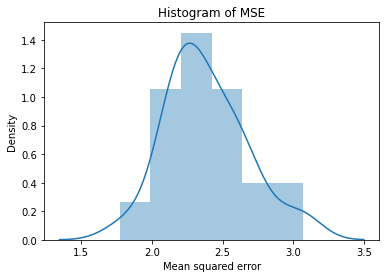

In [100]:
#Histogram of MSE
# it follows normal distribution

plt=sns.distplot(MSE)
plt.set(xlabel ="Mean squared error", title ='Histogram of MSE')

#### Calculating Confidence interval for OOB

In [101]:
#calculating Confidence interval for MSE
#reference taken from given reference Central limit thorey ipython notebook

table= PrettyTable()
table = PrettyTable(["#samples", "number of Sample means", "Sample mean","Left C.I","Right C.I"])

MSE=np.array(MSE)
sample=MSE
sample_mean = sample.mean()  #find mean
sample_std =  sample.std()   #find std
sample_size = len(sample)
# here we are using sample standard deviation instead of population standard deviation
left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)#finding left limit of C.I
right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3) #finding Right limit of C.I
row = []
row.append('MSE')
row.append(sample_size)
row.append(sample_mean)
row.append(left_limit)
row.append(right_limit)
table.add_row(row)
print(table)

+----------+------------------------+--------------------+----------+-----------+
| #samples | number of Sample means |    Sample mean     | Left C.I | Right C.I |
+----------+------------------------+--------------------+----------+-----------+
|   MSE    |           35           | 2.3841482246933463 |  2.288   |   2.481   |
+----------+------------------------+--------------------+----------+-----------+


# OOB_score

#### Histogram of OOB_score

[Text(0.5, 0, 'OOB error'), Text(0.5, 1.0, 'Histogram of out of bag error')]

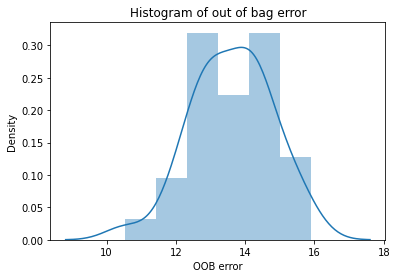

In [102]:
#Histogram of OOB_score
# it follows normal distribution

plt=sns.distplot(OOB)
plt.set(xlabel ="OOB error", title ='Histogram of out of bag error')

#### Calculating Confidence interval for OOB

In [103]:
#calculating Confidence interval for OOB
table = PrettyTable()
table = PrettyTable(["#samples", "number of Sample means", "Sample mean","Left C.I","Right C.I"])

OOB=np.array(OOB)       #convering to array
sample=OOB
sample_mean = sample.mean()  #find mean
sample_std =  sample.std()   #find std
sample_size = len(sample)
# here we are using sample standard deviation instead of population standard deviation
left_limit  = np.round(sample_mean - 2*(sample_std/np.sqrt(sample_size)), 3)  #finding left limit of C.I
right_limit = np.round(sample_mean + 2*(sample_std/np.sqrt(sample_size)), 3)  #finding Right limit of C.I
row = []
row.append('OOB_score') #drawing prettytable
row.append(sample_size)
row.append(sample_mean)
row.append(left_limit)
row.append(right_limit)
table.add_row(row)
print(table)

+-----------+------------------------+--------------------+----------+-----------+
|  #samples | number of Sample means |    Sample mean     | Left C.I | Right C.I |
+-----------+------------------------+--------------------+----------+-----------+
| OOB_score |           35           | 13.611296251464012 |  13.225  |   13.997  |
+-----------+------------------------+--------------------+----------+-----------+


# <font color='blue'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

In [104]:
xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
xq=np.array(xq)     #convering query point from list to array
y_pred=[]           #store y_pred for Xq across all 30 models

for i in range(30):
    y_pred=np.append(y_pred,model_i[i].predict(xq[list_selected_columns[i]].reshape(1, -1))) #finding y_pred across all model with necessary columns needed for each model

In [105]:
np.median(y_pred)            #median value for y_pred but we consider mean value as predicted house price

19.45

In [106]:
the_house_price_for_xq = y_pred.mean()     #Here,we are taking mean value of y_pred as predicted house price for the given xq
print(f"Predicted house price for given query point {xq} is {the_house_price_for_xq} units")

Predicted house price for given query point [1.8000e-01 2.0000e+01 5.0000e+00 0.0000e+00 4.2100e-01 5.6000e+00
 7.2200e+01 7.9500e+00 7.0000e+00 3.0000e+01 1.9100e+01 3.7213e+02
 1.8600e+01] is 21.075333333333333 units


# <font color='red'><b>observations</b></font>

### Task 1

- We found MSE=2.7815090429426124 and OOB score=15.030707703073817. OOB score is always higher than MSE since it is calculated with predicted values of the given datapoints with which the model is not trained on.


- if OOB score is not changing drastically over many iterations, then it shows that our all model is build robously with non biased sampling datapoints


- So finding **OOB score is like testing the model in training phase itself**.  

### Task 2

- Here we found MSE and OOB score for 35 iterations.At each iterations we sampled 506 datapoints and found y predicted for each datapoint with 30 models and averaged them.Then we found mean of squared errors which is MSE.


- According to central limit theorem, sampling distribution of sample means approximately follows Normal distribution. So MSE is the mean of squre of errors which is like sample means.So **samples of MSE and OOB follows normal distribution** which can be seen on histogram.

### Task 3

- We get the predicted housing price of the given xq as **21.075333333333333 units**